In [1]:
#import necessary librries 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SATHVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SATHVIK\.cache\kagglehub\datasets\snehaanbhawal\resume-dataset\versions\1


In [4]:
import kagglehub
import pandas as pd
import os
import zipfile

# Download dataset
dataset_path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

# Check if dataset is a zip file and extract
for file in os.listdir(dataset_path):
    if file.endswith(".zip"):
        zip_path = os.path.join(dataset_path, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        print("Dataset extracted!")

# Find CSV file in dataset folder (including subdirectories)
csv_file = None
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break
    if csv_file:
        break

if csv_file:
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully!")
else:
    print("CSV file not found.")


Dataset loaded successfully!


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None


In [6]:
print(df.head())

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [7]:
  # Drop duplicates
  df.drop_duplicates(inplace=True)

  # Drop rows with missing values
  df.dropna(inplace=True)


In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Initialize stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the resume text column
df['cleaned_resume'] = df['Resume_str'].apply(preprocess_text)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned resume text
tfidf_matrix = vectorizer.fit_transform(df['cleaned_resume'])


In [10]:
  pip install flask pandas scikit-learn nltk PyPDF2 python-docx


Note: you may need to restart the kernel to use updated packages.


In [11]:
  from PyPDF2 import PdfFileReader
  import docx

  def extract_text_from_pdf(pdf_path):
      with open(pdf_path, 'rb') as file:
          reader = PdfFileReader(file)
          text = ''
          for page_num in range(reader.numPages):
              text += reader.getPage(page_num).extract_text()
      return text

  def extract_text_from_docx(docx_path):
      doc = docx.Document(docx_path)
      return '\n'.join([para.text for para in doc.paragraphs])


In [12]:
  import re
  from nltk.tokenize import word_tokenize

  def preprocess_text(text):
      # Convert to lowercase
      text = text.lower()
      # Remove special characters and numbers
      text = re.sub(r'[^a-z\s]', '', text)
      # Tokenize
      tokens = word_tokenize(text)
      return tokens


In [13]:
  from nltk.corpus import stopwords

  stop_words = set(stopwords.words('english'))

  def remove_stopwords(tokens):
      return [word for word in tokens if word not in stop_words]


In [14]:
print("Available columns in the dataset:", df.columns)


Available columns in the dataset: Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'cleaned_resume'], dtype='object')


In [15]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.head())  # Display first few rows


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  \
0  <div class="fontsize fontface vmargins hmargin...       HR   
1  <div class="fontsize fontface vmargins hmargin...       HR   
2  <div class="fontsize fontface vmargins hmargin...       HR   
3  <div class="fontsize fontface vmargins hmargin...       HR   
4  <div class="fontsize fontface vmargins hmargin...       HR   

                                      cleaned_resume  
0  hr administratormarketing associate hr adminis...  
1  hr specialist us hr operations summary versati...  
2  hr director summary years experience recruit

In [16]:
  from sklearn.feature_extraction.text import TfidfVectorizer

  # Sample corpus: list of resume texts
  
  corpus = df['Resume_str'].apply(lambda x: ' '.join(remove_stopwords(preprocess_text(x))))

  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(corpus)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target variable
X = tfidf_matrix
y = df['Category']  # Assuming 'Category' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.74      0.90      0.81        29
              ADVOCATE       0.68      0.57      0.62        30
           AGRICULTURE       0.33      0.12      0.18         8
               APPAREL       0.56      0.25      0.34        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.74      0.81      0.77        21
               BANKING       0.67      0.78      0.72        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.65      0.48      0.55        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.90      0.79      0.84        34
            CONSULTANT       0.50      0.25      0.33        20
              DESIGNER       0.69      0.95      0.80        19
         DIGITAL-MEDIA       0.79      

C:\Users\SATHVIK\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATHVIK\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATHVIK\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

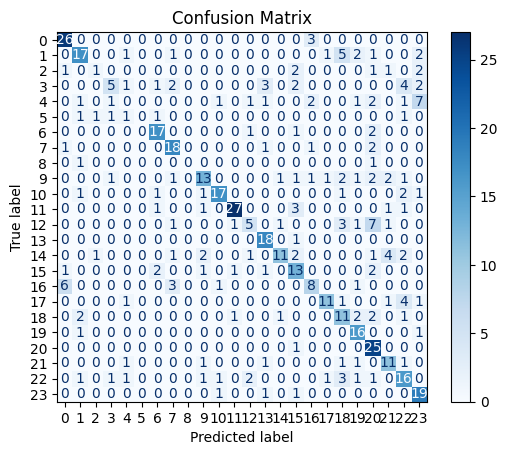

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Display confusion matrix
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [20]:
  job_description = "Your job description here"
  job_description_processed = ' '.join(remove_stopwords(preprocess_text(job_description)))
  job_description_tfidf = vectorizer.transform([job_description_processed])


In [21]:
  from sklearn.metrics.pairwise import cosine_similarity

  similarities = cosine_similarity(job_description_tfidf, tfidf_matrix)
  similarity_scores = similarities.flatten()


In [22]:
  import numpy as np

  top_indices = np.argsort(similarity_scores)[-10:][::-1]
  top_resumes = df.iloc[top_indices]


In [23]:
top_indices

array([1861, 1586, 1921, 1688,   33,  311, 2163, 1983, 2220, 1015],
      dtype=int64)

In [24]:
top_resumes

,ID,Resume_str,Resume_html,Category,cleaned_resume
1861,17556527,ACCOUNTANT Summary Gener...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,accountant summary general accounting procedur...
1586,20918464,SENIOR ACCOUNTANT / FINANCE CONTROLLE...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,senior accountant finance controller summary a...
1921,18635654,GENERAL ACCOUNTANT Professional...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT,general accountant professional summary around...
1688,56025640,LIGHT INDUSTRIAL MAINTENANCE / RESIDE...,"<div class=""fontsize fontface vmargins hmargin...",APPAREL,light industrial maintenance residential profe...
33,57667857,HR CONSULTANT Summary Detai...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr consultant summary detailoriented years hum...
311,26746496,DATABASE PROGRAMMER/ANALYST (.NET DEV...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,database programmeranalyst net developer summa...
2163,22615491,BANKING BOOT CAMP PARTICIPANT S...,"<div class=""fontsize fontface vmargins hmargin...",BANKING,banking boot camp participant summary recent g...
1983,27066370,PROJECT COORDINATOR/SITE ACQUISITION ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,project coordinatorsite acquisition constructi...
2220,98348532,TERADATA SENIOR ASSOCIATE CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",BANKING,teradata senior associate consultant summary h...
1015,79376680,SALES Summary When thinking...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sales summary thinking timeline career numerou...


In [25]:
  import pickle

  shortlisted_candidates = top_resumes[['ID','Resume_str', 'Category']]

  # Save to a pickle file
  with open('shortlisted_candidates.pkl', 'wb') as file:
      pickle.dump(shortlisted_candidates, file)


In [26]:
  # Load from the pickle file
  with open('shortlisted_candidates.pkl', 'rb') as file:
      loaded_candidates = pickle.load(file)


In [27]:
import pickle

# Save the trained model
with open('resume_classifier.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [28]:
import numpy as np

# Sum TF-IDF scores for each resume
tfidf_scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

# Get indices of top N resumes
top_n = 5
top_indices = np.argsort(tfidf_scores)[-top_n:][::-1]  # Sort in descending order

# Print top resumes
print("Top Resumes based on TF-IDF scores:")
for idx in top_indices:
    print(f"\nResume {idx+1}:")
    print(df.iloc[idx]['Resume_str'])  # Replace 'Resume' with the correct column name


Top Resumes based on TF-IDF scores:

Resume 1085:
         SALES ASSOCIATE       Summary     Experienced Manager at HyVee Grocery Store with excellent client and project management skills. Action-oriented with strong ability to communicate effectively with technology, executive, and business audiences. Self-motivated and dependable while achieving high performance with minimal supervision.  Demonstrated the ability to complete tasks accurately despite interruptions and competing demands.  Detail-oriented and organized Transportation Logistics Coordinator offers comprehensive background in transportation management. Expert in transportation operations, waste prevention and safety compliance.  HyVee  with broad background, including management, customer service and general warehouse operations. Vast experience in all aspects of loading and transporting materials.  Resourceful Hyvee and Retech with 2 years Hyvee and  ReTech 1year in warehouse and inventory management. Specializes in incre

In [29]:
# Get predicted probabilities (for classifiers like Logistic Regression, SVM, etc.)
probs = clf.predict_proba(X_test)

# Get top N resumes with highest probability for the positive class
top_n = 5
top_indices = np.argsort(probs[:, 1])[-top_n:][::-1]  # Sort in descending order

# Print top resumes
print("Top Resumes based on Model Predictions:")
for idx in top_indices:
    print(f"\nResume {idx+1}:")
    print(df.iloc[idx]['Resume_str'])  # Replace 'Resume' with the actual column name


Top Resumes based on Model Predictions:

Resume 167:
         SOLUTION DESIGNER       Summary    Seeking a Planning Engineer position to utilize my skills and abilities in an industry that offers security and professional growth while being resourceful innovative and flexible.      Highlights         Packages          :   AutoCAD 2D & 3D,           Primavera Complete (Web,Client,           Progress Reporter, Team Member) M.S-Office, M.S-Dos,  Digital Designing  & Video Editing (Adobe-Photoshop, Page Maker, Illustrator, Corel-Draw, Adobe-Preimere, Ulead Video Studio, Macromedia Flash,  Projects, Computer Fundamentals and Information Technology).               Experience      Solution Designer     Mar 2014   to   Current      Company Name   －   City  ,   State     Designing projects.  Manage all site and department specific requirements related to the projects being executed.  Preparing OCS, WIR, MIR.  Track site variations and field instructions.  Program updates in conjunction with sch

In [32]:
category = "Data Scientist"  # Change to your target category

# Find resumes in this category
top_resumes = df[df['Category'] == category].head(5)  #

# Print top resumes
print(f"Top resumes for {category}:")
for idx, row in top_resumes.iterrows():
    print(f"\nResume {idx+1}:")
    print(row['Resume_str']) 

Top resumes for Data Scientist:


In [33]:
category = "HR"  

# Find resumes in this category
top_resumes = df[df['Category'] == category].head(5)  # Adjust 'Category' column name

# Print top resumes
print(f"Top resumes for {category}:")
for idx, row in top_resumes.iterrows():
    print(f"\nResume {idx+1}:")
    print(row['Resume_str'])  # Replace 'Resume' with the correct column name


Top resumes for HR:

Resume 1:
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies